In [2]:
                                             #East_West Airlines

In [20]:
import pandas as pd
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch 
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

#keep file in same directory

In [15]:
ew = pd.read_excel("EastWestAirlines (1).xlsx" , sheet_name = "data")
ew1 = ew.drop(["ID#"] , axis=1)
print(ew1.describe())        #shows the summary


ew1.info()      #shows type and if there any missing values


            Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03   3999.000000  3999.000000  3999.000000  3999.000000   
mean   7.360133e+04    144.114529     2.059515     1.014504     1.012253   
std    1.007757e+05    773.663804     1.376919     0.147650     0.195241   
min    0.000000e+00      0.000000     1.000000     1.000000     1.000000   
25%    1.852750e+04      0.000000     1.000000     1.000000     1.000000   
50%    4.309700e+04      0.000000     1.000000     1.000000     1.000000   
75%    9.240400e+04      0.000000     3.000000     1.000000     1.000000   
max    1.704838e+06  11148.000000     5.000000     3.000000     5.000000   

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count    3999.000000   3999.00000        3999.000000      3999.000000   
mean    17144.846212     11.60190         460.055764         1.373593   
std     24150.967826      9.60381        1400.209171         3.793172   
min         0.000000   

In [16]:
#Now we have to normalize the value into the range of 0 to 1.
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

norm_ew = norm_func(ew1)
norm_ew.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


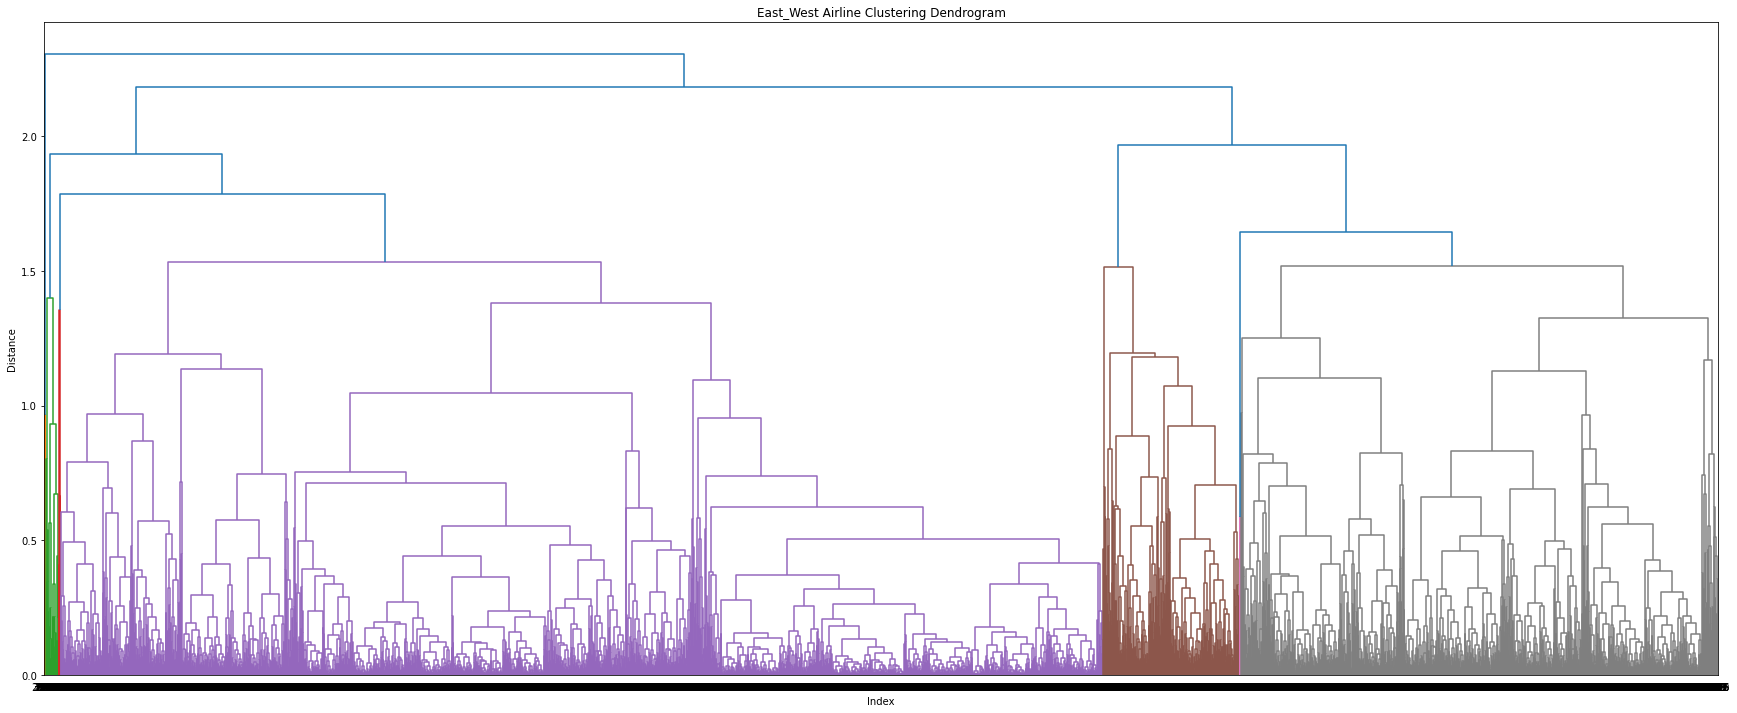

In [17]:
#Create the linkage

z = linkage(norm_ew, method = "complete", metric = "euclidean")

# Dendrogram
plt.figure(figsize=(30, 12));plt.title('East_West Airline Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z, 
     leaf_rotation = 0,  # rotates the x axis labels
     leaf_font_size = 10 # font size for the x axis labels
)

plt.show()

In [22]:
ew_comp = AgglomerativeClustering(n_clusters = 5 , linkage = "complete" ,affinity = "euclidean" ).fit(norm_ew)
ew_comp.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int64)

In [23]:
ew_cluster_column = pd.Series(ew_comp.labels_)

#now assign this matrix to to data set as a new column.

ew['grouping']=ew_cluster_column

ew

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,grouping
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [24]:
#now take the grouping column to the 1st.

ew_new = ew.iloc[ : ,[12,0,1,2,3,4,6,7,8,9,10,11] ]
ew_new

,grouping,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,1,28143,0,1,1,174,1,0,0,7000,0
1,0,2,19244,0,1,1,215,2,0,0,6968,0
2,0,3,41354,0,1,1,4123,4,0,0,7034,0
3,0,4,14776,0,1,1,500,1,0,0,6952,0
4,1,5,97752,0,4,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,2,4017,18476,0,1,1,8525,4,200,1,1403,1
3995,2,4018,64385,0,1,1,981,5,0,0,1395,1
3996,2,4019,73597,0,3,1,25447,8,0,0,1402,1
3997,0,4020,54899,0,1,1,500,1,500,1,1401,0
